# Deep Learning : Recurrent Neural Networks (RNN)


## 1 Rappel des notions de base MLP 

Jusqu'à présent, nous utilisions l'architecture de réseau neuronal la plus simple, le perceptron multicouche (MLP), qui est un réseau neuronal à propagation avant. Dans ce type de réseau, les données sont transmises de la couche d'entrée à la couche de sortie, sans aucune forme de mémoire interne. Cela signifie que les données sont traitées indépendamment les unes des autres, sans tenir compte de leur ordre. Cela rend les MLP inadaptés à la tâche de prédiction de séquences temporelles, car ils ne peuvent pas prendre en compte l'ordre des données.

<img src='https://scikit-learn.org/stable/_images/multilayerperceptron_network.png' width=400>
<img src='https://quera.fr/wp-content/uploads/2023/12/RNN_representation.png' width=150>


Les Réseaux Neuronaux Récursifs (Recurrent Neural Networks, RNN) sont une classe de réseaux neuronaux conçus pour travailler avec des données séquentielles ou temporelles. Contrairement aux réseaux de neurones classiques, les RNN ont la capacité de prendre en compte l'historique des données en utilisant une forme de mémoire interne. Cela les rend particulièrement adaptés à des tâches où la séquence des données est importante, comme la prédiction de séquences temporelles, la traduction automatique, la génération de texte, et bien d'autres.

Sur ces shémas, les cercles représentent les neurones, les flèches les connexions entre les neurones, et les carrés les couches de neurones. Les flèches vertes représentent les connexions entre les neurones de couches adjacentes, tandis que les flèches rouges représentent les connexions récurrentes entre les neurones d'une même couche. X représente les données d'entrée, Y les données de sortie.


## 1.1 RNN : Architecture

La caractéristique clé des RNN est leur capacité à maintenir une mémoire à court terme des informations précédentes tout en effectuant des calculs sur de nouvelles données. Cela est réalisé en introduisant des connexions récurrentes dans le réseau, ce qui lui permet de prendre en compte les états antérieurs dans le processus d'apprentissage. Les RNN sont donc capables de traiter des données séquentielles en tenant compte de l'ordre des données.

Il existe plusieurs types de RNN :
- One-to-one : une entrée, une sortie (ex : classification d'image)
- One-to-many : une entrée, plusieurs sorties (ex : génération de légende d'image)
- Many-to-one : plusieurs entrées, une sortie (ex : analyse de sentiments)
- Many-to-many : plusieurs entrées, plusieurs sorties (ex : traduction automatique)

<img src='https://quera.fr/wp-content/uploads/2023/12/RNN_types.png'>



## 1.2 RNN : Hideen State (état caché)


Un état caché (hidden state) dans un Réseau Neuronal Récursif (RNN) est une représentation interne dynamique générée par le réseau à mesure qu'il traite une séquence d'entrée. Contrairement aux états cachés dans un réseau feedforward classique, les états cachés dans un RNN sont déterminés non seulement par l'entrée actuelle, mais aussi par les entrées précédentes dans la séquence.

L'état caché d'un RNN à un moment donné capture une information résumée sur ce qui a été vu jusqu'à ce moment-là dans la séquence. Il agit comme une sorte de mémoire interne du réseau, lui permettant de maintenir une représentation de l'historique des données séquentielles. Cela permet au réseau de prendre en compte l'ordre des données, ce qui le rend particulièrement adapté à la prédiction de séquences temporelles.

<img src='https://quera.fr/wp-content/uploads/2023/12/hidden_state.png' width=200>



Formellement, le calcul de l'état caché dans un RNN peut être exprimé comme suit :


<img src='https://quera.fr/wp-content/uploads/2023/12/RNN_ex1.png'>


$h_t = f(W_{hh} \cdot h_{t-1} + W_{hx} \cdot x_t + b_h)$

Où :
- $h_t$ est l'état caché à l'instant $t$,
- $W_{hh}$ est la matrice de poids associée à l'état caché précédent,
- $W_{hx}$ est la matrice de poids associée à l'entrée actuelle,
- $b_h$ est le biais,
- $f$ est une fonction d'activation.

Cet état caché est ensuite utilisé pour générer la sortie à cet instant ou pour influencer la génération de l'état caché à l'instant suivant dans le cas des RNN récurrents.

Dans des architectures plus avancées comme les Long Short-Term Memory (LSTM) et les Gated Recurrent Unit (GRU), l'état caché est modifié et régulé par des mécanismes de portes, ce qui leur permet de mieux gérer les dépendances à long terme dans les séquences.

## 1.3 RNN : Application à la prédiction de séquences temporelles

Les RNN sont particulièrement adaptés à la prédiction de séquences temporelles, car ils peuvent prendre en compte l'ordre des données. Ils sont donc souvent utilisés pour la prédiction de séries temporelles, comme la prédiction de la demande de produits, la prédiction des prix des actions, la prédiction de la consommation d'énergie, etc.


Nous allons prendre pour exemple l'évolution du cours d'une action.

In [ ]:
!pip install yfinance

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

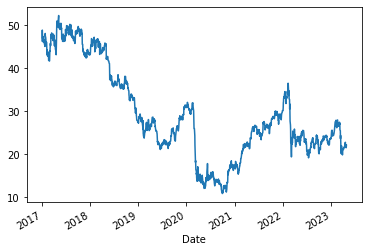

In [1]:
# Import via yahoo finance
import yfinance as yf
import numpy as np

# Import des données historiques de la Société Générale depuis le 1er janvier 2017
df = yf.download("GLE.PA", start="2017-01-01", end="2023-04-30")
df.Open.plot()

In [2]:
y = df['Close']
X = df[['High', 'Low', 'Open']]
X

,High,Low,Open
Date,,,
2017-01-02,47.099998,46.240002,46.360001
2017-01-03,49.200001,47.255001,47.380001
2017-01-04,49.375000,47.695000,48.860001
2017-01-05,47.915001,46.875000,47.439999
2017-01-06,47.590000,46.779999,46.935001
...,...,...,...
2023-04-24,22.459999,22.100000,22.195000
2023-04-25,22.155001,21.465000,22.135000
2023-04-26,21.750000,21.040001,21.510000


In [3]:
def processData(X, y, n_days_history):
    X_,Y_ = [],[]
    for i in range(len(X)-n_days_history-1):
        X_.append(X.iloc[i:i+n_days_history].values)
        Y_.append(y.iloc[i+n_days_history])

    return np.array(X_), np.array(Y_)

X, y = processData(X, y, 5)
X.shape, y.shape

((1615, 5, 3), (1615,))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

def my_RNN():

    model = Sequential()
    model.add(SimpleRNN(units=32, return_sequences=True, input_shape=(5,3)))
    model.add(SimpleRNN(units=32, return_sequences=True))
    model.add(SimpleRNN(units=32, return_sequences=False))

    model.add(Dense(units=1, activation='linear'))

    return model

model = my_RNN()

model.compile(optimizer='adam', loss='mse')

history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=300, batch_size=128)

Epoch 1/300


2023-12-05 02:04:53.558177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 975.2776

2023-12-05 02:04:55.240495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 3s 135ms/step - loss: 975.2776 - val_loss: 458.8527
Epoch 2/300
11/11 [==============================] - 1s 94ms/step - loss: 861.7979 - val_loss: 397.8331
Epoch 3/300
11/11 [==============================] - 1s 91ms/step - loss: 794.8989 - val_loss: 359.0939
Epoch 4/300
11/11 [==============================] - 1s 89ms/step - loss: 744.6417 - val_loss: 323.1840
Epoch 5/300
11/11 [==============================] - 1s 88ms/step - loss: 703.8995 - val_loss: 301.9914
Epoch 6/300
11/11 [==============================] - 1s 88ms/step - loss: 678.0113 - val_loss: 285.8136
Epoch 7/300
11/11 [==============================] - 1s 88ms/step - loss: 656.8235 - val_loss: 271.4056
Epoch 8/300
11/11 [==============================] - 1s 88ms/step - loss: 637.2429 - val_loss: 258.0098
Epoch 9/300
11/11 [==============================] - 1s 87ms/step - loss: 618.8961 - val_loss: 245.4775
Epoch 10/300
11/11 [==============================] - 1s 90ms/step - loss: 

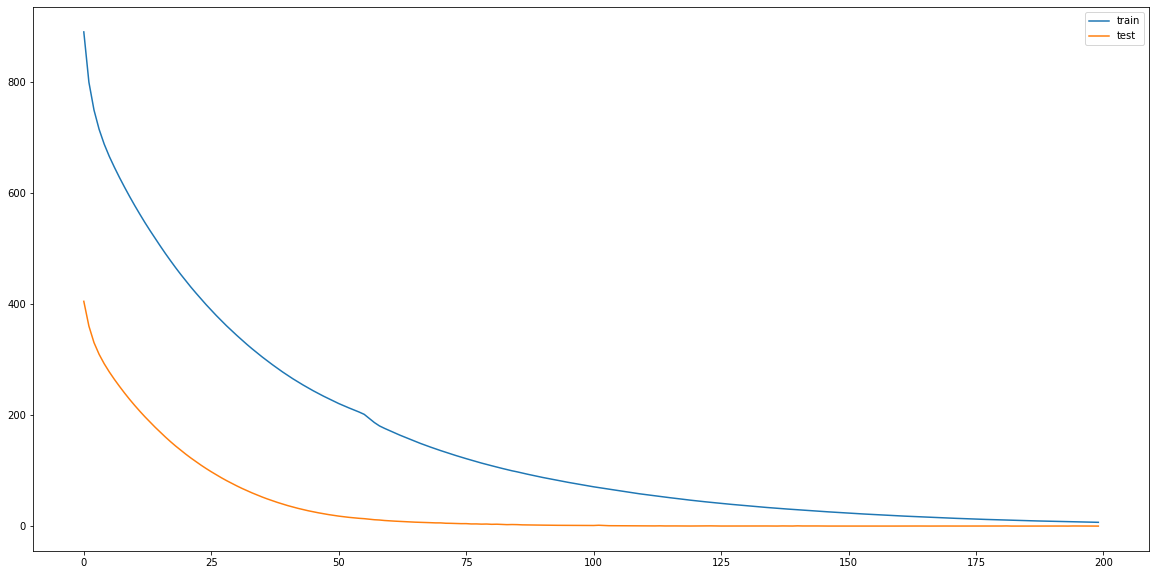

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

 4/11 [=========>....................] - ETA: 0s

2023-12-05 02:03:10.201691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 23ms/step


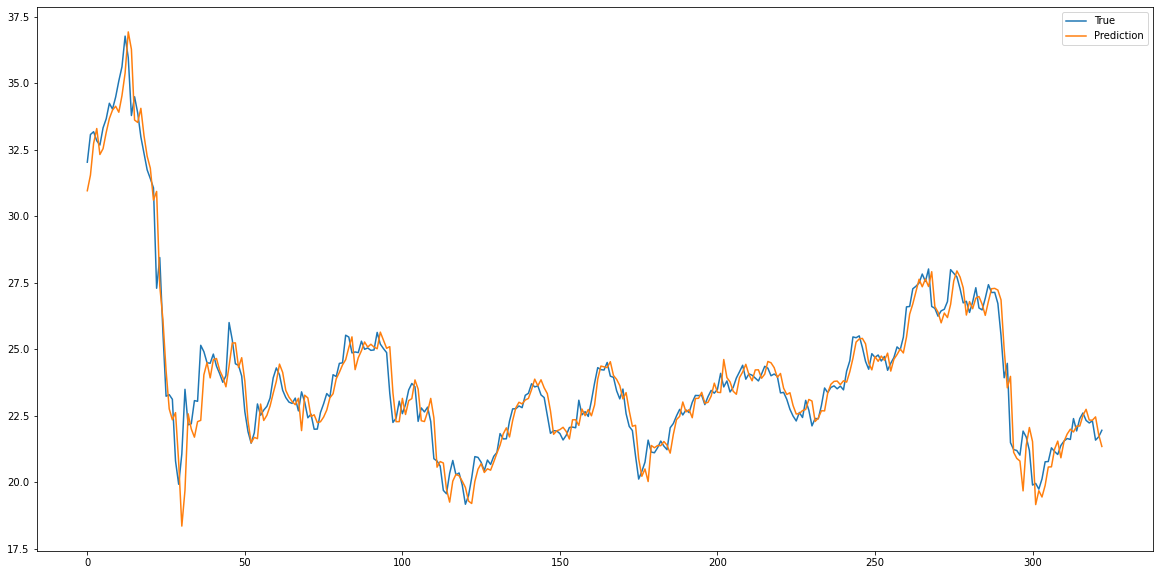

In [7]:
# Prédiction des valeurs bourisères
plt.figure(figsize=(20,10))
plt.plot(y_test, label='True')
plt.plot(model.predict(X_test) , label='Prediction')
plt.legend()

# 2. LSTM : Long Short Term Memory

## 2.1 Défaillance des RNN

Les RNN sont particulièrement adaptés à la prédiction de séquences temporelles, car ils peuvent prendre en compte l'ordre des données. Ils sont donc souvent utilisés pour la prédiction de séries temporelles, comme la prédiction de la demande de produits, la prédiction des prix des actions, la prédiction de la consommation d'énergie, etc.

<img src='https://quera.fr/wp-content/uploads/2023/12/RNN_cell.png'>

LSTM (Long Short-Term Memory) est une architecture de réseau de neurones récurrents (RNN) qui a été proposée pour résoudre le problème de la disparition du gradient dans les RNN classiques. Contrairement aux RNN classiques, qui ont des problèmes de rétention de l'information à long terme, les LSTM sont conçus pour permettre à l'information de se propager sans entrave.

# 2.2 LSTM : Architecture


LSTM est une architecture créée en 1997, elle vise à résoudre les limitations des RNN. La formulation du LSTM peut être considérée comme assez complexe, mais en réalité, les LSTM sont simples et assez intuitifs.

<img src='https://quera.fr/wp-content/uploads/2023/12/LSTM_cell.png'>

LSTM possède également un état caché qui modélise le signal à court terme , mais il introduit également ce que l'on appelle l'état cellulaire qui modélise la dépendance à long terme (ce qui manquait aux RNN !).

Il s'appuie sur le concept de portes qui permet de décider de ce qu'il faut garder. LSTM a trois portes :

oublier la porte décider de ce qui est important à partir des informations passées stockées dans l'état de la cellule
la porte d'entrée décide de ce qui est important à partir de l'entrée du pas de temps actuel
la porte de sortie décide de ce qui doit être conservé pour le signal à court terme (état caché)
Et voilà ! La combinaison de tous ces éléments permet d’avoir un réseau bien plus puissant que le RNN standard (en pratique plus personne n’utilise de RNN !)

Les équations du LSTM peuvent être exprimées comme suit :

- Porte d'oubli ($f_t$) :
$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $

- Porte d'entrée ($i_t$) :
$ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $

- Porte de mise à jour ($u_t$) :
$ u_t = \tanh(W_u \cdot [h_{t-1}, x_t] + b_u) $

- État de cellule mis à jour ($c_t$) :
$ c_t = f_t \cdot c_{t-1} + i_t \cdot u_t $

- Porte de sortie ($o_t$) :
$ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) $

- État caché mis à jour ($h_t$) :
$ h_t = o_t \cdot \tanh(c_t) $

Où :
- $x_t$ est l'entrée à l'instant $t$,
- $h_{t-1}$ est l'état caché à l'instant $t-1$,
- $[h_{t-1}, x_t]$ représente la concaténation de l'état caché et de l'entrée,
- $W_f, b_f, W_i, b_i, W_u, b_u, W_o, b_o$ sont les poids et biais associés à chaque porte,
- $\sigma$ est la fonction sigmoïde,
- $\tanh$ est la fonction tangente hyperbolique.

Ces équations décrivent le fonctionnement des portes et des mises à jour de l'état dans un LSTM, permettant au modèle de gérer efficacement les dépendances à long terme dans les séquences.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

def my_RNN():

    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=(5,3)))
    model.add(LSTM(units=32, return_sequences=True))
    model.add(LSTM(units=32, return_sequences=False))

    model.add(Dense(units=1, activation='linear'))

    return model

model = my_RNN()

model.compile(optimizer='adam', loss='mse')

history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=300, batch_size=128)

Epoch 1/300


2023-12-05 02:31:28.645783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:29.150779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:30.107684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:30.238184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:30.449622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:31.130198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:31.326639: I tensorflow/core/grappler/optimizers/cust

11/11 [==============================] - ETA: 0s - loss: 1059.5000

2023-12-05 02:31:33.390933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:33.569465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:33.670159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:31:33.768240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 7s 235ms/step - loss: 1059.5000 - val_loss: 569.7233
Epoch 2/300
11/11 [==============================] - 0s 35ms/step - loss: 1020.7932 - val_loss: 521.9351
Epoch 3/300
11/11 [==============================] - 0s 34ms/step - loss: 931.6575 - val_loss: 423.0919
Epoch 4/300
11/11 [==============================] - 0s 34ms/step - loss: 802.4751 - val_loss: 342.3880
Epoch 5/300
11/11 [==============================] - 0s 32ms/step - loss: 715.1902 - val_loss: 296.7261
Epoch 6/300
11/11 [==============================] - 0s 31ms/step - loss: 662.7377 - val_loss: 268.4310
Epoch 7/300
11/11 [==============================] - 0s 31ms/step - loss: 629.1736 - val_loss: 249.1667
Epoch 8/300
11/11 [==============================] - 0s 31ms/step - loss: 604.2385 - val_loss: 233.5322
Epoch 9/300
11/11 [==============================] - 0s 33ms/step - loss: 582.9813 - val_loss: 219.6000
Epoch 10/300
11/11 [==============================] - 0s 32ms/step - loss

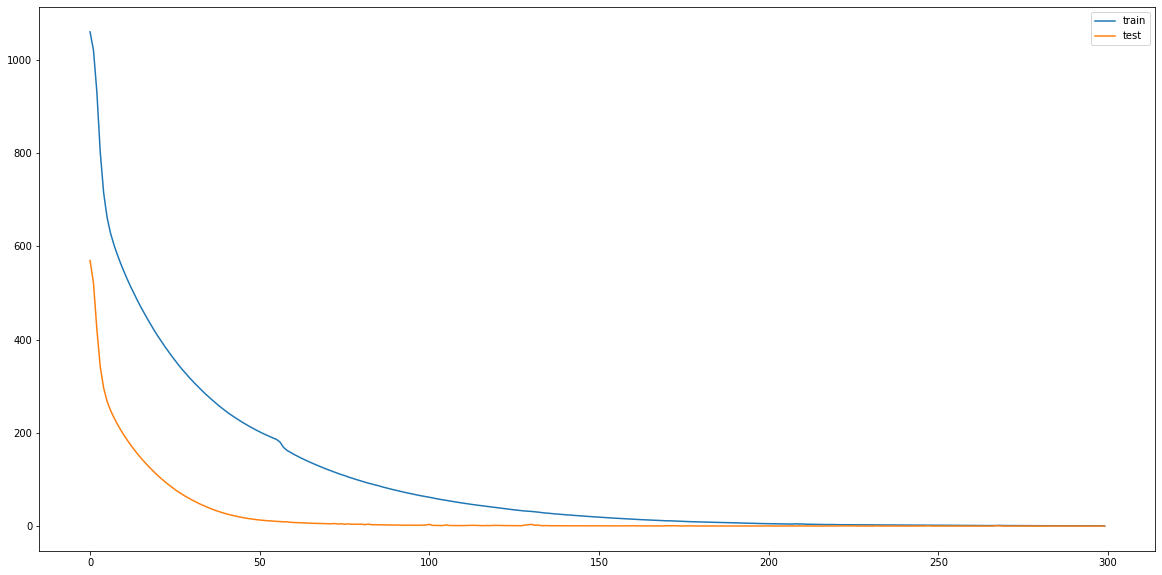

In [16]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

2023-12-05 02:33:42.396215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:33:42.573358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:33:42.705283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-12-05 02:33:42.822150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 2s 71ms/step


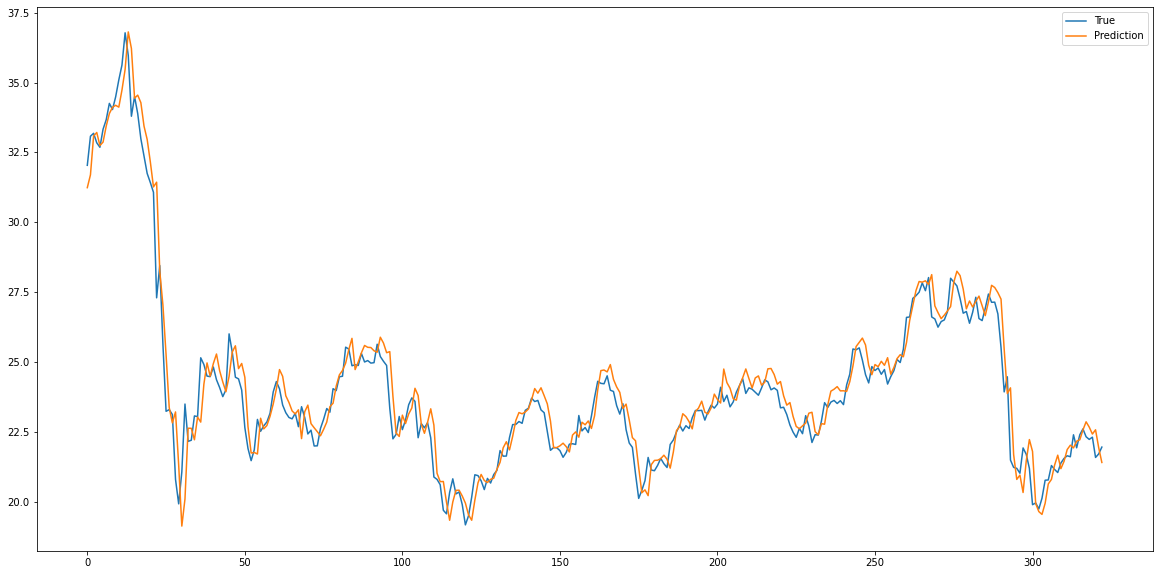

In [17]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='True')
plt.plot(model.predict(X_test) , label='Prediction')
plt.legend()

---
# Exercice 1 : Prédiction de séries temporelles avec LSTM

